In [61]:
# Импорт библиотек
import numpy as np 
import pandas as pd 

In [62]:
"""Генерируем матрицу случайных значений размером 30х30

каждая строка характеризует нормальное состояние

"""
normal_state_generating = np.random.default_rng().normal(0.5, 0.1, size=(30, 30)) 

In [63]:
"""создаем переменную rng - генератор случайных чисел

"""
rng = np.random.default_rng(12345)
print(rng)

Generator(PCG64)


In [64]:
"""Создаем матрицу аномальных состояний

"""
anomal_state_generating = np.random.default_rng().normal(0.5, 0.1, size=(30, 30))

# Добавляем выбросы характеризущие выход параметров за пределы пороговых значений
for i in range(len(anomal_state_generating)):
    rints = rng.integers(low=0, high=29, size=1)
    anomal_state_generating[i, rints] = np.random.default_rng().normal(20, 0.1, size=(1, 1))

In [65]:
#Соединяем сгенерированные матрицы в единый массив
state_base = np.vstack((normal_state_generating, anomal_state_generating))

In [66]:
#Создаем из имеющегося массива особый тип массива pd.Dataframe
df = pd.DataFrame(state_base)

<AxesSubplot:>

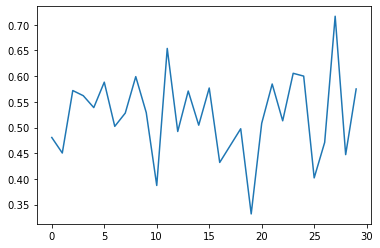

In [67]:
"""Выводим график девятого состояния

"""
z = df.iloc[29,:]
z.plot()

<AxesSubplot:>

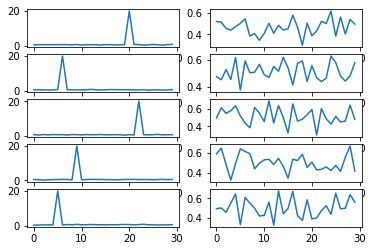

In [68]:
"""Выводим одновременно несколько графиков с нормальными и аномальными состояниями

"""

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=5, ncols=2)

# Состояния с 1 по 5е
df.iloc[1,:].plot(ax=axes[0,1])
df.iloc[2,:].plot(ax=axes[1,1])
df.iloc[3,:].plot(ax=axes[2,1])
df.iloc[4,:].plot(ax=axes[3,1])
df.iloc[5,:].plot(ax=axes[4,1])

# Состояния с 30 по 34
df.iloc[30,:].plot(ax=axes[0,0])
df.iloc[31,:].plot(ax=axes[1,0])
df.iloc[32,:].plot(ax=axes[2,0])
df.iloc[33,:].plot(ax=axes[3,0])
df.iloc[34,:].plot(ax=axes[4,0])


In [69]:
"""Создаем массив с целевыми значениями

"""

targets = np.zeros((60,1))
targets[30:] = np.ones((30,1))
targets_pd = pd.DataFrame(targets)

In [201]:
"""Создаем переменные из имеющихся массивов для обучения нейронной сети x - входные данные,

y - результаты распознавания

"""

x = df
y = np.ravel(targets_pd)

In [94]:
"""Из библиотеки sclearn загружаем нейронную сеть и обучаем ее"""
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=1000).fit(x, y)

In [214]:
"""Проверяем работоспособность нейронной сети путем

передачи на ее вход имеющихся состояний

"""
x1 = np.array(x.loc[31])
x1 = x1.reshape(1,-1)
clf.predict(x1)

array([1.])